In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import xarray as xr

In [2]:
def calc_rmse(column_a, column_b):
    return np.power(np.nanmean(((column_a - column_b) ** 2)), .5)

In [3]:
#path_to_comparison_data = '/data/comparison_data/BONA_ltr_massdata.csv'
path_to_comparison_data = '/data/comparison_data/AMF_US-xBN_BASE_HH_6-5_cleaned.csv'
cell_x_coord = 0
cell_y_coord = 3

In [4]:
comparison_data=pd.read_csv(path_to_comparison_data)
comparison_data = comparison_data.replace(-9999.0, np.nan)
comparison_data['date'] = pd.to_datetime(comparison_data['date'])

In [5]:
comparison_data.head()

,Unnamed: 0,TIMESTAMP_START,TIMESTAMP_END,CO2_1_1_1,H2O_1_1_1,CO2_1_1_2,H2O_1_1_2,CO2_1_1_3,H2O_1_1_3,CO2_1_2_2,...,THROUGHFALL_2_1_1,THROUGHFALL_3_1_1,THROUGHFALL_4_1_1,THROUGHFALL_5_1_1,CH4_MIXING_RATIO_1_1_1,CH4_MIXING_RATIO_1_2_1,CH4_MIXING_RATIO_1_3_1,CH4_MIXING_RATIO_1_4_1,CH4_MIXING_RATIO_1_5_1,date
0,14593,201711010030,201711010100,424.203743,4.326249,424.500246,4.082014,NaN,NaN,432.105370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 00:30:00
1,14594,201711010100,201711010130,425.987247,4.307520,426.729990,4.062994,426.758883,5.118013,428.227891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 01:00:00
2,14595,201711010130,201711010200,427.563757,4.257694,427.889144,4.021490,NaN,NaN,432.397684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 01:30:00
3,14596,201711010200,201711010230,428.073249,4.174550,429.460716,3.925704,429.377095,5.006532,431.013881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 02:00:00
4,14597,201711010230,201711010300,426.907554,4.206945,425.591835,3.995900,428.954510,4.978804,431.060906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 02:30:00


In [6]:
comparison_data['month'] = pd.DatetimeIndex(comparison_data['date']).month
comparison_data['year'] = pd.DatetimeIndex(comparison_data['date']).year

In [7]:
comparison_data['TA_1_1_1_int'] = comparison_data['TA_1_1_1'].interpolate(method='linear')

In [8]:
temp_gaps = pd.DatetimeIndex(comparison_data[np.isnan(comparison_data['TA_1_1_1'])]['date'])
interpolated = comparison_data[np.isnan(comparison_data['TA_1_1_1'])]['TA_1_1_1_int']
#first_temp_date = comparison_data[~np.isnan(comparison_data['TA_1_1_1'])]['date'].min()
#first_temp_date

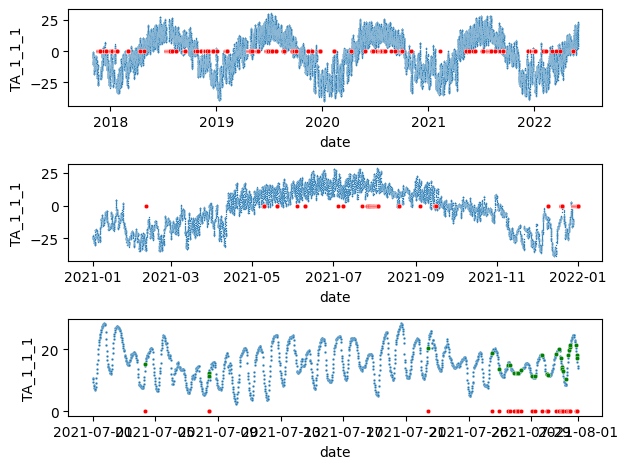

In [9]:
fig, axes = plt.subplots(3,1)
sns.scatterplot(data=comparison_data, x='date', y = 'TA_1_1_1', s=1, ax=axes[0])
sns.scatterplot(x=temp_gaps, y = np.zeros(len(temp_gaps)), s=10, ax=axes[0], color='red')

sns.scatterplot(data=comparison_data[comparison_data['year']==2021], x='date', y = 'TA_1_1_1', s=1, ax=axes[1])
sns.scatterplot(x=temp_gaps[temp_gaps.year==2021], y = np.zeros(len(temp_gaps[temp_gaps.year==2021])), s=10, ax=axes[1], color='red')

sns.scatterplot(data=comparison_data[(comparison_data['year']==2021) & (comparison_data['month']==7)], x='date', y = 'TA_1_1_1', s=3, ax=axes[2])
sns.scatterplot(x=temp_gaps[(temp_gaps.year==2021)&(temp_gaps.month==7)], y = np.zeros(len(interpolated[(temp_gaps.year==2021)&(temp_gaps.month==7)])), s=10, ax=axes[2], color='red')
sns.scatterplot(x=temp_gaps[(temp_gaps.year==2021)&(temp_gaps.month==7)], y = interpolated[(temp_gaps.year==2021)&(temp_gaps.month==7)], s=10, ax=axes[2], color='green')
fig.tight_layout()

In [10]:
precip_gaps = comparison_data[np.isnan(comparison_data['P'])]['date']

In [11]:
comparison_data.columns.to_list()

['Unnamed: 0',
 'TIMESTAMP_START',
 'TIMESTAMP_END',
 'CO2_1_1_1',
 'H2O_1_1_1',
 'CO2_1_1_2',
 'H2O_1_1_2',
 'CO2_1_1_3',
 'H2O_1_1_3',
 'CO2_1_2_2',
 'H2O_1_2_2',
 'CO2_1_2_3',
 'H2O_1_2_3',
 'CO2_1_3_2',
 'H2O_1_3_2',
 'CO2_1_3_3',
 'H2O_1_3_3',
 'CO2_1_4_2',
 'H2O_1_4_2',
 'CO2_1_4_3',
 'H2O_1_4_3',
 'CO2_1_5_2',
 'H2O_1_5_2',
 'CO2_1_5_3',
 'H2O_1_5_3',
 'WS_1_1_1',
 'WS_MAX_1_1_1',
 'WD_1_1_1',
 'T_SONIC',
 'T_SONIC_SIGMA',
 'FC',
 'SC',
 'NEE_PI',
 'LE',
 'SLE',
 'USTAR',
 'H',
 'SH',
 'FETCH_90',
 'FETCH_MAX',
 'V_SIGMA',
 'WS_1_2_1',
 'WS_1_3_1',
 'WS_1_4_1',
 'WS_1_5_1',
 'WS_MAX_1_2_1',
 'WS_MAX_1_3_1',
 'WS_MAX_1_4_1',
 'WS_MAX_1_5_1',
 'WD_1_2_1',
 'WD_1_3_1',
 'WD_1_4_1',
 'WD_1_5_1',
 'TA_1_1_1',
 'TA_1_1_2',
 'TA_1_2_1',
 'TA_1_3_1',
 'TA_1_4_1',
 'TA_1_5_1',
 'PA',
 'RH',
 'VPD_PI',
 'T_CANOPY_1_1_1',
 'T_CANOPY_1_2_1',
 'T_CANOPY_1_3_1',
 'T_CANOPY_2_3_1',
 'SW_DIF',
 'SW_IN_1_1_1',
 'SW_IN_1_1_2',
 'SW_IN_1_1_3',
 'SW_OUT',
 'LW_IN',
 'LW_OUT',
 'LW_BC_IN',
 'LW_BC_O

In [12]:
precip_gaps

649     2017-11-14 13:00:00
650     2017-11-14 13:30:00
651     2017-11-14 14:00:00
652     2017-11-14 14:30:00
653     2017-11-14 15:00:00
                ...        
80232   2022-05-30 12:30:00
80233   2022-05-30 13:00:00
80234   2022-05-30 13:30:00
80235   2022-05-30 14:00:00
80236   2022-05-30 14:30:00
Name: date, Length: 61687, dtype: datetime64[ns]

In [13]:
comparison_data.head()

,Unnamed: 0,TIMESTAMP_START,TIMESTAMP_END,CO2_1_1_1,H2O_1_1_1,CO2_1_1_2,H2O_1_1_2,CO2_1_1_3,H2O_1_1_3,CO2_1_2_2,...,THROUGHFALL_5_1_1,CH4_MIXING_RATIO_1_1_1,CH4_MIXING_RATIO_1_2_1,CH4_MIXING_RATIO_1_3_1,CH4_MIXING_RATIO_1_4_1,CH4_MIXING_RATIO_1_5_1,date,month,year,TA_1_1_1_int
0,14593,201711010030,201711010100,424.203743,4.326249,424.500246,4.082014,NaN,NaN,432.105370,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 00:30:00,11,2017,-2.8138
1,14594,201711010100,201711010130,425.987247,4.307520,426.729990,4.062994,426.758883,5.118013,428.227891,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 01:00:00,11,2017,-2.8890
2,14595,201711010130,201711010200,427.563757,4.257694,427.889144,4.021490,NaN,NaN,432.397684,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 01:30:00,11,2017,-2.9740
3,14596,201711010200,201711010230,428.073249,4.174550,429.460716,3.925704,429.377095,5.006532,431.013881,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 02:00:00,11,2017,-3.1065
4,14597,201711010230,201711010300,426.907554,4.206945,425.591835,3.995900,428.954510,4.978804,431.060906,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 02:30:00,11,2017,-3.0284


In [14]:

comparison_data_pr = comparison_data.groupby(by=['year', 'month']).sum().reset_index()['P']
comparison_data = comparison_data.groupby(by=['year', 'month']).mean().reset_index()
comparison_data['ppt (mm)'] = comparison_data_pr
comparison_data['m_y'] = pd.to_datetime(comparison_data['month'].astype(str) + '-'+ comparison_data['year'].astype(str), format='%m-%Y')
comparison_data.dtypes

year                               int64
month                              int64
Unnamed: 0                       float64
TIMESTAMP_START                  float64
TIMESTAMP_END                    float64
                               ...      
CH4_MIXING_RATIO_1_4_1           float64
CH4_MIXING_RATIO_1_5_1           float64
TA_1_1_1_int                     float64
ppt (mm)                         float64
m_y                       datetime64[ns]
Length: 189, dtype: object

In [15]:
comparison_data.head(50)

,year,month,Unnamed: 0,TIMESTAMP_START,TIMESTAMP_END,CO2_1_1_1,H2O_1_1_1,CO2_1_1_2,H2O_1_1_2,CO2_1_1_3,...,THROUGHFALL_4_1_1,THROUGHFALL_5_1_1,CH4_MIXING_RATIO_1_1_1,CH4_MIXING_RATIO_1_2_1,CH4_MIXING_RATIO_1_3_1,CH4_MIXING_RATIO_1_4_1,CH4_MIXING_RATIO_1_5_1,TA_1_1_1_int,ppt (mm),m_y
0,2017,11,15312.0,2.017112e+11,2.017112e+11,417.623385,2.092104,419.172450,2.127060,419.261803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.761893,8.01,2017-11-01
1,2017,12,16775.5,2.017122e+11,2.017122e+11,418.101618,2.689726,417.139788,2.435302,418.233713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.060420,0.00,2017-12-01
2,2018,1,18263.5,2.018012e+11,2.018012e+11,415.486400,1.617601,416.945409,1.799775,417.284865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.899063,0.00,2018-01-01
3,2018,2,19679.5,2.018021e+11,2.018021e+11,415.909073,2.096470,418.273173,2.147430,417.231914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.727868,0.00,2018-02-01
4,2018,3,21095.5,2.018032e+11,2.018032e+11,416.387423,2.028216,417.257960,2.151084,417.910485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.647664,0.00,2018-03-01
5,2018,4,22559.5,2.018042e+11,2.018042e+11,415.087915,2.366039,416.196424,1.406807,417.807293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.894060,0.00,2018-04-01
6,2018,5,24023.5,2.018052e+11,2.018052e+11,416.914594,5.547621,419.777896,6.086453,419.264776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.093698,0.00,2018-05-01
7,2018,6,25487.5,2.018062e+11,2.018062e+11,421.377139,8.799596,415.521670,8.549456,414.714191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.908172,6.64,2018-06-01
8,2018,7,26951.5,2.018072e+11,2.018072e+11,424.233210,12.380809,420.130588,10.522269,418.895151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.625098,0.87,2018-07-01
9,2018,8,28439.5,2.018082e+11,2.018082e+11,421.024270,11.879831,417.366736,9.781745,416.828601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.966917,0.00,2018-08-01


In [16]:
ds = nc.Dataset('/data/input-catalog/caribou-poker/historic-climate.nc')
ds.variables

{'X': <class 'netCDF4._netCDF4.Variable'>
 int64 X(X)
 unlimited dimensions: 
 current shape = (2,)
 filling on, default _FillValue of -9223372036854775806 used,
 'Y': <class 'netCDF4._netCDF4.Variable'>
 int64 Y(Y)
 unlimited dimensions: 
 current shape = (4,)
 filling on, default _FillValue of -9223372036854775806 used,
 'albers_conical_equal_area': <class 'netCDF4._netCDF4.Variable'>
 |S1 albers_conical_equal_area()
     grid_mapping_name: albers_conical_equal_area
     false_easting: 0.0
     false_northing: 0.0
     latitude_of_projection_origin: 50.0
     longitude_of_central_meridian: -154.0
     standard_parallel: [55. 65.]
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6378137.0
     inverse_flattening: 298.2572221010002
     spatial_ref: PROJCS["NAD83 / Alaska Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.2572221010002,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["

In [17]:
tair = ds.variables['tair'][:,cell_y_coord,cell_x_coord]
nirr = ds.variables['nirr'][:,cell_y_coord,cell_x_coord]
vapor_press = ds.variables['vapor_press'][:,cell_y_coord,cell_x_coord]
precip = ds.variables['precip'][:,cell_y_coord,cell_x_coord]

starting_date = pd.to_datetime('1901-1-1 0:0:0')
timedeltas=[0 + i for i in range(0, np.shape(ds.variables['tair'])[0])]
#dates = [starting_date + pd.Timedelta(t, 'd') for t in timedeltas]
dates = [starting_date + pd.Timedelta(t, 'd') for t in ds.variables['time'][:]]
len(dates)

1380

In [18]:
tem_output_df = pd.DataFrame({'date':dates, 'tair':tair, 'nirr': nirr, 'precip': precip, 'vapor_press': vapor_press})
tem_output_df['month'] = pd.DatetimeIndex(tem_output_df['date']).month
tem_output_df['year'] = pd.DatetimeIndex(tem_output_df['date']).year

In [19]:
tem_output_df.dtypes

date           datetime64[ns]
tair                  float32
nirr                  float32
precip                float32
vapor_press           float32
month                   int64
year                    int64
dtype: object

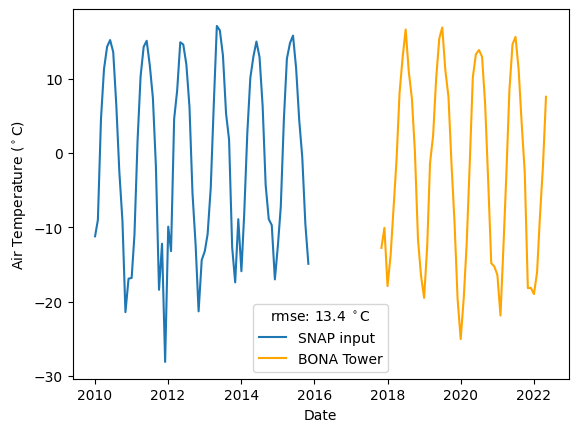

In [30]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='tair', label = 'SNAP input')
sns.lineplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'TA_1_1_1_int', label='BONA Tower', color='orange')

plt.ylabel('Air Temperature ($^\circ$C)')
plt.xlabel('Date')
rmse = np.around(calc_rmse(tem_output_df['tair'], comparison_data['TA_1_1_1_int']), decimals=1)
ax.legend(title='rmse: {} $^\circ$C'.format(rmse), title_fontsize=10)

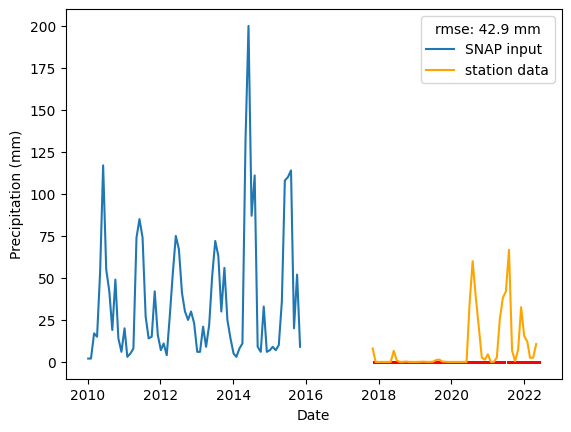

In [21]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='precip', label = 'SNAP input')
sns.lineplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'ppt (mm)', label='station data', color='orange')
sns.scatterplot(x=precip_gaps, y=np.zeros(len(precip_gaps)), color='red', linewidth=0, s=3)
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
#plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-05-01'))
rmse=np.around(calc_rmse(tem_output_df['precip'], comparison_data['ppt (mm)']), decimals=1)
ax.legend(title='rmse: {} mm'.format(rmse), title_fontsize=10)

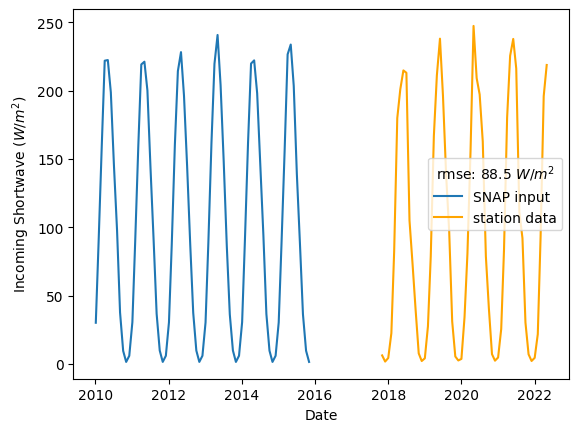

In [22]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='nirr', label = 'SNAP input')
sns.lineplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'SW_IN_1_1_2', label='station data', color='orange')
plt.ylabel('Incoming Shortwave ($W/m^2$)')
plt.xlabel('Date')
rmse=np.around(calc_rmse(tem_output_df['nirr'], comparison_data['SW_IN_1_1_2']), decimals=1)
ax.legend(title='rmse: {} $W/m^2$'.format(rmse), title_fontsize=10)


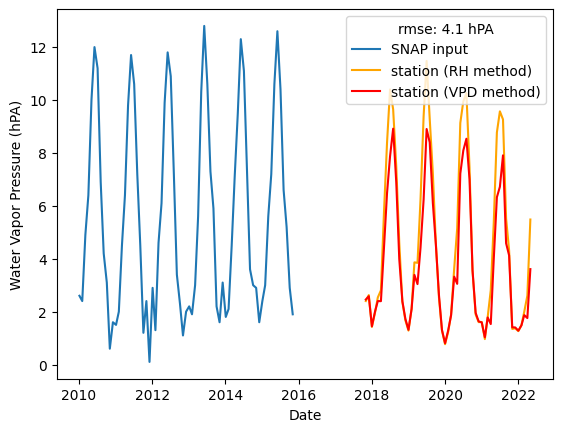

In [23]:
fig, ax = plt.subplots()

dt_comp = pd.to_datetime('2010-01-01')

t_kelvin = comparison_data['TA_1_1_1'] + 273.15 #convert from deg. C to K
sat_vap_press = (611*np.exp((17.27*comparison_data['TA_1_1_1'])/t_kelvin))/100 #calculate saturation vapor pressure (hPA)
vap_press = ((comparison_data['RH']/100) * sat_vap_press) #calculate vapor pressure based on RH and saturation vapor pressure (hPA)
vap_press2 = sat_vap_press - comparison_data['VPD_PI'] #calculate vapor pressure based on vapor pressure defecit and saturation vapor pressure (hPA)

sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='vapor_press', label = 'SNAP input')
sns.lineplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= vap_press, label='station (RH method)', color='orange')
sns.lineplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= vap_press2, label='station (VPD method)', color='red')

plt.ylabel('Water Vapor Pressure (hPA)')
plt.xlabel('Date')
rmse=np.around(calc_rmse(tem_output_df['vapor_press'], vap_press), decimals=1)
ax.legend(title='rmse: {} hPA'.format(rmse), title_fontsize=10)

In [24]:
#time diff between SNAP end and BONA beginning
SNAP_end = tem_output_df['date'].max()
BONA_begin = comparison_data['m_y'].min()

print(SNAP_end)
print(BONA_begin)

2015-11-03 00:00:00
2017-11-01 00:00:00


In [25]:
tem_co2 = nc.Dataset('/data/input-catalog/caribou-poker/co2.nc')

In [26]:
tem_co2_df = pd.DataFrame({'year': tem_co2.variables['year'][:], 'co2': tem_co2.variables['co2'][:]})

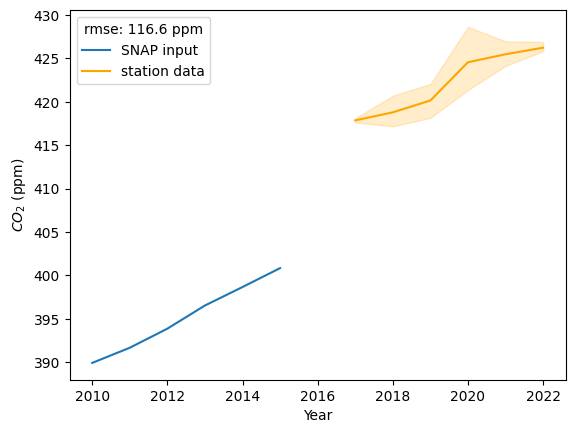

In [27]:
fig, ax = plt.subplots()
sns.lineplot(data = tem_co2_df[tem_co2_df['year']>=2010], x='year', y='co2', label = 'SNAP input')
sns.lineplot(data = comparison_data[comparison_data['year']>=2010], x = 'year', y= 'CO2_1_1_1', label='station data', color='orange')
plt.ylabel('$CO_{2}$ (ppm)')
plt.xlabel('Year')
rmse=np.around(calc_rmse(tem_co2_df['co2'], comparison_data['CO2_1_1_1']), decimals=1)
ax.legend(title='rmse: {} ppm'.format(rmse), title_fontsize=10)